In [1]:
import os
import cv2
from torchvision.models import vgg16,VGG16_Weights
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from PIL import Image 
import torch
from tqdm.notebook import tqdm

In [3]:
base_model = vgg16(weights=VGG16_Weights.DEFAULT)

feature_model = nn.Sequential(*list(base_model.children())[:-1]).to('cuda')

feature_model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
print(feature_model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
root_dir = "dataset/"

image_dir = os.path.join(root_dir,"images")

In [6]:
transformation = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [7]:
features = {}
for file_name in  tqdm(os.listdir(image_dir)):

    img_path = os.path.join(image_dir,file_name)  #Set the image path
    img = Image.open(img_path) #Read image
    if img.mode == 'L':
        img = img.convert('RGB')
    img = transformation(img) #apply trasnformation
    img = img.to('cuda')
    with torch.no_grad():     
        outputs = feature_model(img.unsqueeze(0))
    img_id = file_name.split('_')[2]
    img_id = int(img_id.split('.')[0])
    features[img_id] = outputs


  0%|          | 0/82783 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
import pickle

In [11]:
pickle.dump(features, open(os.path.join(root_dir, 'features.pkl'), 'wb'))


In [11]:
with open('dataset/features.pkl','rb') as f:
    features = pickle.load(f)

KeyError: 0

In [36]:
output = features[9]

In [27]:
output.data

tensor([[[[ 0.0000,  0.0000,  0.4058,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.6485,  4.3341,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.3645,  3.4485,  7.1475,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  2.8572,  4.1899,  3.6474],
          [ 1.7083,  3.2813,  3.3403,  ...,  0.5161,  3.8628,  3.3467],
          [ 0.4545,  3.0947,  5.2141,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0904],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.3276,  

In [32]:
processed = []
for feature_map in output:
    print(feature_map.shape)
    print(feature_map.shape)
    gray_scale = torch.sum(feature_map,0)
    print(gray_scale)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

torch.Size([512, 7, 7])
torch.Size([512, 7, 7])
tensor([[175.0219, 161.5667, 179.7632, 205.3173, 258.5582, 398.2423, 335.0193],
        [173.6885, 262.3613, 445.0947, 477.8712, 476.9797, 626.5371, 483.6542],
        [205.7798, 387.8336, 576.6870, 538.9067, 353.2628, 287.5573, 201.0371],
        [278.4384, 317.1747, 262.3624, 277.0553, 408.4772, 384.1058, 270.7583],
        [175.9318, 204.6458, 263.3024, 372.9146, 478.6529, 532.1685, 403.5854],
        [361.8575, 461.3048, 320.7711, 278.3350, 413.5662, 561.0317, 457.7584],
        [369.5696, 427.1920, 306.8699, 232.6386, 287.8803, 343.3936, 350.0388]],
       device='cuda:0')
(7, 7)


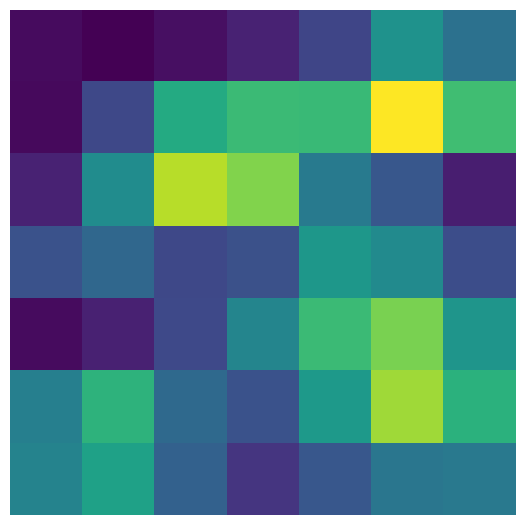

In [31]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')